
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from time import time

In [ ]:
data_source = "https://raw.githubusercontent.com/Shivsharma779/SMAI_a3_data_source/main/titanic.csv"
df1 = pd.read_csv(data_source)

The missing values can be seen below

In [ ]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
def normalise(X):
    return np.subtract(X,X.min())/np.subtract(X.max(),X.min())

In the following cell these operation were performed:
1. There were three columns with missing values namely Age, Cabin and Embarked. The missing values were handled in the following manner
  - As Cabin had a large no missing values it was dropped from the dataset
  - The Embarked column was filled with mode of the column that turned out to be 'S'
  - Age's missing values were filled with the mean
2. The column's Name, Ticket and PassengerId does not contribute to the survival of the passenger hence they were dropped.
3. The PClass and Embarked are of string type and pandas function of get dummies was used to convert it into one hot encoding, later one column was dropped as the information about that column can be gained through the remaining column



In [ ]:
df1  =  df1.drop(['Cabin'],axis = 1)
df1["Embarked"].fillna(df1["Embarked"].mode(),inplace = True)
df1["Age"].fillna(df1["Age"].mean(),inplace = True)

df1  =  df1.drop(['PassengerId'],axis = 1)
df1  =  df1.drop(['Name'],axis = 1)
df1  =  df1.drop(['Ticket'],axis = 1)


df1 = pd.get_dummies(df1,columns = ["Embarked"])
df1 = pd.get_dummies(df1,columns = ["Pclass"])
df1 = pd.get_dummies(df1,columns = ["Sex"])

df1  =  df1.drop(['Pclass_1'],axis = 1)
df1  =  df1.drop(['Embarked_Q'],axis = 1)
df1  =  df1.drop(['Sex_female'],axis = 1)



In [ ]:
from sklearn.model_selection import train_test_split
X = df1.iloc[:,df1.columns!='Survived']
y = df1.iloc[:,df1.columns=='Survived']
X = normalise(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

# Logistic Regression Model

Logistic regression from scratch using gradient descent with learning rate=0.5 and epoch = 50000

In [ ]:
W = np.zeros(((X_train.shape[1]),1))
W_ = np.random.rand(1)

def pred_y(W,W_,X):
  return sigmoid(np.dot(X,W)+W_)
def sigmoid(X):
  return 1/(1+np.exp(-X.astype(float)))

def cost_func(W,W_,X,Y):
    h = pred_y(W,W_,X)    
    return (-1/len(X))*np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))

def pred_label(W,W_,X):
  return np.where(pred_y(W,W_,X)>=0.5,1,0)

def train(W,W_,X,Y,l,epoch):
    m = len(X[:,0])
    for i in range(epoch):
            
            error_y = pred_y(W,W_,X)-Y
            
            delta = (l/m) * np.dot(error_y.T, X)
            tempW = W - delta.T  
            tempW_ = W_ - l/m * np.sum(error_y)
            W,W_ = tempW,tempW_
#             print(cost_func(W,W_,X,Y))
    return W,W_

start = time()
z,z_= train(W,W_,X_train.to_numpy(),Y_train.to_numpy(),0.5,50000)
end = time()
print("Training time: ",end-start)

Training time:  2.2428219318389893


**MODEL METRICS:**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
my_model_prediction = pred_label(z,z_,X_test)
print("-----------------------------\nAccuracy Score: ", accuracy_score(my_model_prediction,Y_test))
print("-----------------------------\nConfusion Matrix:\n", confusion_matrix(my_model_prediction,Y_test))
print("-----------------------------\nClassification Report:\n",classification_report(my_model_prediction,Y_test))

-----------------------------
Accuracy Score:  0.8097014925373134
-----------------------------
Confusion Matrix:
 [[142  40]
 [ 11  75]]
-----------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       182
           1       0.65      0.87      0.75        86

    accuracy                           0.81       268
   macro avg       0.79      0.83      0.80       268
weighted avg       0.84      0.81      0.82       268



# SKlearn Model Metrics:

In [ ]:
from sklearn.linear_model import LogisticRegression
# Y_test = Y_test.to_numpy()
model = LogisticRegression()
model.fit(X_train, Y_train.to_numpy().flatten())
sklearn_model_prediction = model.predict(X_test)
print("-----------------------------\nAccuracy Score: ", accuracy_score(sklearn_model_prediction,Y_test))
print("-----------------------------\nConfusion Matrix:\n", confusion_matrix(sklearn_model_prediction,Y_test))
print("-----------------------------\nClassification Report:\n",classification_report(sklearn_model_prediction,Y_test))

-----------------------------
Accuracy Score:  0.8097014925373134
-----------------------------
Confusion Matrix:
 [[141  39]
 [ 12  76]]
-----------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.85       180
           1       0.66      0.86      0.75        88

    accuracy                           0.81       268
   macro avg       0.79      0.82      0.80       268
weighted avg       0.84      0.81      0.81       268



# Heatmap

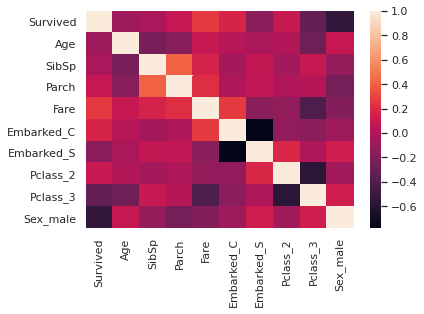

In [ ]:
import seaborn 
seaborn.set_theme()
seaborn.heatmap(df1.corr())